### Gaussian processes

In [14]:
import numpy as np


confidence = 0.95
x = np.random.normal(size=100)
values = [np.random.choice(x,size=len(x),replace=True).mean() for i in range(1000)] 
np.percentile(values,[100*(1-confidence)/2,100*(1-(1-confidence)/2)]) 
# array([-0.13559955, 0.26480175])

array([0.00421665, 0.39186614])

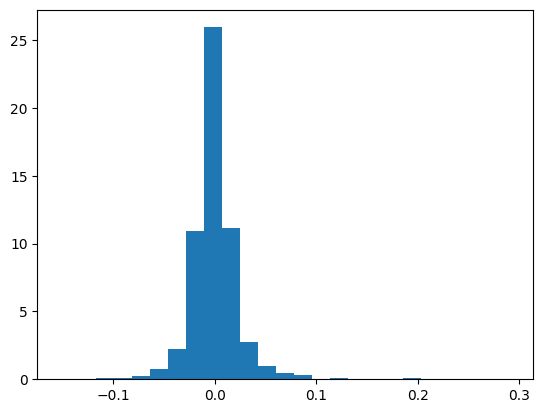

In [34]:
import matplotlib.pyplot as plt

plt.hist(interdayReturns, bins=25, density=True)
plt.show()

https://medium.com/analytics-vidhya/monte-carlo-simulations-for-predicting-stock-prices-python-a64f53585662

In [17]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_datareader import data
import random

In [18]:
stockName = 'BEM.BK'
stock = data.DataReader(stockName, 'yahoo',start='01/1/2000', end='01/12/2018')
# stock = data.DataReader(stockName, 'yahoo', start='01/1/1900')
stock.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-09-21,2.937773,2.451999,2.544528,2.891509,4367124.0,2.596508
2006-09-22,2.984037,2.822113,2.960905,2.891509,134844061.0,2.596508
2006-09-25,2.984037,2.868377,2.891509,2.960905,46332461.0,2.658824
2006-09-26,2.984037,2.937773,2.984037,2.960905,24272616.0,2.658824
2006-09-27,3.030301,2.960905,2.960905,3.007169,57854471.0,2.700368


In [20]:
stock.shape

(2771, 6)

In [21]:
time_elapsed = (stock.index[-1] - stock.index[0]).days
time_elapsed

4131

In [31]:
workingDays = 249

interdayReturns = []
dataAdjPrice = pd.DataFrame(stock)

for k in range(1, len(dataAdjPrice['Adj Close'].values)):
    interdayReturn = (dataAdjPrice['Adj Close'].values[k] / dataAdjPrice['Adj Close'].values[k - 1]) - 1
    interdayReturns.append(interdayReturn)
        
# dividend = μ
dividend = np.mean(interdayReturns)
# Volatility = σ
stdevS = np.std(interdayReturns, ddof=1)
# annualizedVolatility
annualizedVolatility = np.sqrt(workingDays) * stdevS

In [40]:
dataAdjPrice['Adj Close'].values[-1]

7.168673038482666

In [35]:
dividend

0.0006804129766288515

In [36]:
stdevS

0.025479220760764306

In [37]:
annualizedVolatility

0.4020553220060206

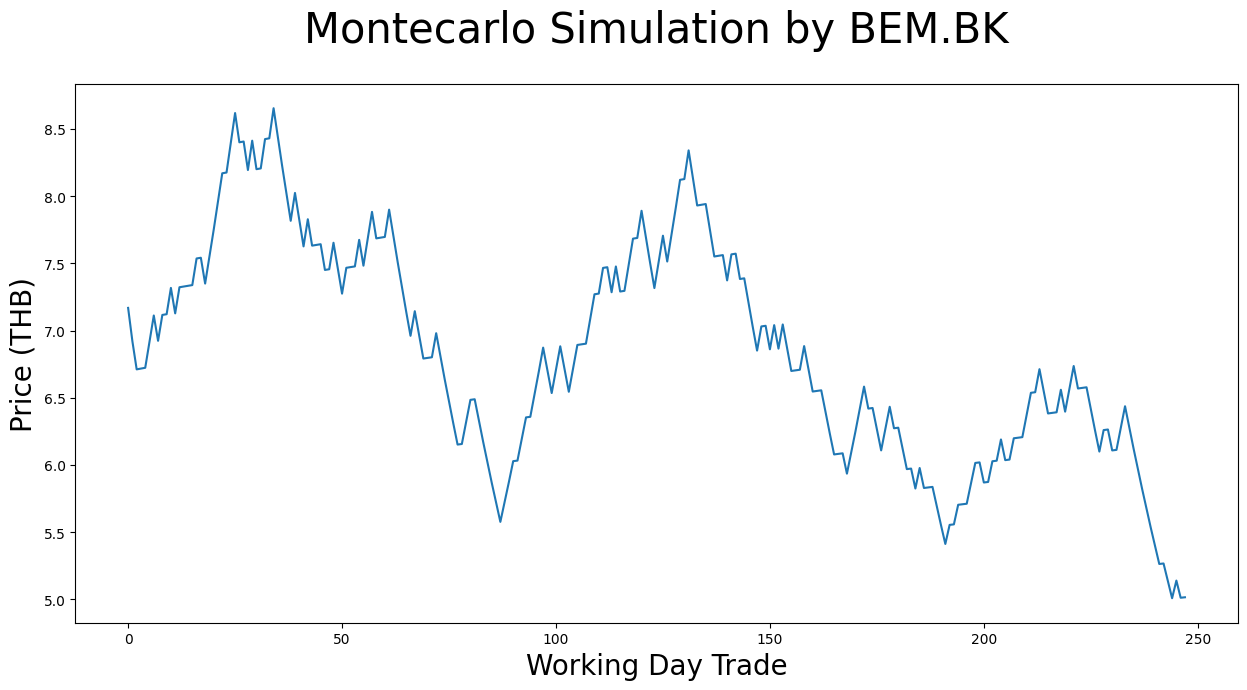

In [41]:
changes = []
priceSeries = [dataAdjPrice['Adj Close'].values[-1]]

day = 1
for k in range(2, workingDays):
    day = k / (k-1)

    event = random.randint(-1, 1)
    a = (dividend * day)
    b = (stdevS * event * np.sqrt(day))
    changePrice = priceSeries[-1] * (a + b)
    changes.append(changePrice)

    closePrice = priceSeries[-1] + changePrice;
    priceSeries.append(closePrice)

plt.figure(figsize=(15,7))
plt.title("Montecarlo Simulation by "+ stockName, loc='center', pad=30, fontsize=30)
plt.xlabel("Working Day Trade", fontsize=20)
plt.ylabel("Price (THB)", fontsize=20)
plt.plot(priceSeries)
plt.show()